## Megaline Telecomunication

# Perusahaan telekomunikasi yang memiliki 500 data client untuk di analysis

# Pra Pemrosesan Data

## Konversi data satu persatu untuk

In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt 
from scipy import stats as st

In [3]:
data1= pd.read_csv('megaline_users.csv')
data2= pd.read_csv('megaline_calls.csv')
data3= pd.read_csv('megaline_internet.csv')
data4= pd.read_csv('megaline_messages.csv')
data5= pd.read_csv('megaline_plans.csv')

## Melakukan pengecekan pada data yang sudah di konversi satu per satu

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


# Dari 5 sumber dataset terdapat pertanyaan ada berapa user yang harus di anlysis ?

In [8]:
data2.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [9]:
data2.sample(frac=0.7)

,id,user_id,call_date,duration
13025,1056_168,1056,2018-10-30,17.02
100090,1358_553,1358,2018-05-06,14.18
48549,1174_526,1174,2018-06-28,10.41
20532,1077_499,1077,2018-07-09,0.00
27802,1106_60,1106,2018-06-19,4.42
...,...,...,...,...
19014,1072_564,1072,2018-09-26,4.32
136529,1494_371,1494,2018-09-17,13.88
58533,1211_142,1211,2018-11-17,9.88
72370,1257_110,1257,2018-06-05,12.39


In [10]:
data2['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033,
       1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044,
       1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055,
       1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066,
       1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077,
       1078, 1079, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1090,
       1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
       1102, 1103, 1104, 1105, 1106, 1107, 1109, 1110, 1111, 1112, 1113,
       1114, 1115, 1116, 1117, 1118, 1119, 1120, 1122, 1123, 1124, 1125,
       1126, 1127, 1128, 1130, 1132, 1133, 1134, 1135, 1136, 1138, 1139,
       1140, 1141, 1142, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151,
       1152, 1153, 1154, 1155, 1156, 1157, 1158, 11

# Dapat di simpulkan di ambil dari data2 kolom user _id ada 500 user yang akan di analysis, ada tipe data yang harus di sesuaikan untuk mempermudah analysis.

# Pertanyaan mengenai mengapa datetime

## Penyesuaian "date time" untuk memberikan kemudahan analysis dengan menyesuaikan tipe data

In [11]:
data1[['reg_date', 'churn_date']] = data1[['reg_date', 'churn_date']].apply(pd.to_datetime)

In [12]:
data1.sample(frac=0.5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
356,1356,Hae,Ryan,46,"Milwaukee-Waukesha, WI MSA",2018-05-16,surf,NaT
175,1175,Shiloh,Stafford,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-30,surf,NaT
316,1316,Lucilla,Weeks,59,"Tulsa, OK MSA",2018-05-21,surf,NaT
333,1333,Macy,David,57,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-11-24,ultimate,NaT
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaT
...,...,...,...,...,...,...,...,...
445,1445,Elodia,Donovan,71,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,ultimate,NaT
486,1486,Sang,Solis,29,"Orlando-Kissimmee-Sanford, FL MSA",2018-12-05,surf,NaT
436,1436,Jennine,Kinney,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-26,ultimate,NaT
408,1408,Alaine,Robertson,40,"Baltimore-Columbia-Towson, MD MSA",2018-01-11,surf,NaT


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [14]:
data2['call_date'] = pd.to_datetime(data2['call_date'])

In [15]:
data2.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [16]:
data3['session_date'] = pd.to_datetime(data3['session_date'])

In [17]:
data3.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [18]:
data4['message_date'] = pd.to_datetime(data4['message_date'])

In [19]:
data4.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


# Penyesuaian date time sudah di lakukan dan di cek untuk memudahkan analysis dan pembuatan hipotesis

## Mencari nilai yang hilang

# Melakukan pemerikasaan nilai yang hilang dari kolom yang memiliki unsur datetime

In [20]:
data1[['reg_date', 'churn_date']].describe()

/tmp/ipykernel_57/3004406337.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data1[['reg_date', 'churn_date']].describe()
/tmp/ipykernel_57/3004406337.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data1[['reg_date', 'churn_date']].describe()


,reg_date,churn_date
count,500,34
unique,266,29
top,2018-07-12 00:00:00,2018-12-18 00:00:00
freq,5,3
first,2018-01-01 00:00:00,2018-07-31 00:00:00
last,2018-12-31 00:00:00,2018-12-31 00:00:00


# Pertanyaan bagaimana bisa melakukan asumsi mengenai tanggal 2019 - 01 - 01

In [21]:
today = '2019-01-01'
today = pd.to_datetime(today, format = '%Y-%m-%d')
data1['churn_date'] = data1['churn_date'].fillna(today)

In [22]:
data1.sample(frac=0.5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
291,1291,Angeles,Mejia,65,"Indianapolis-Carmel-Anderson, IN MSA",2018-01-29,surf,2019-01-01
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
207,1207,Samuel,Porter,63,"Omaha-Council Bluffs, NE-IA MSA",2018-12-22,surf,2019-01-01
162,1162,Mark,Farley,20,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,ultimate,2019-01-01
350,1350,Al,Rasmussen,29,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-09,surf,2019-01-01
...,...,...,...,...,...,...,...,...
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,2019-01-01
273,1273,Hermila,Ryan,25,"Baton Rouge, LA MSA",2018-10-13,ultimate,2019-01-01
451,1451,Lenard,Harding,53,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-02-15,ultimate,2018-12-10
267,1267,Gia,Parker,53,"St. Louis, MO-IL MSA",2018-03-12,surf,2019-01-01


In [23]:
data1['churn_date'].isna().sum()

0

## melakukan pengecekan nilai duplikat

In [24]:
#memeriksa duplikasi pada setiap dataframe
print(data1.duplicated().sum())
print(data2.duplicated().sum())
print(data3.duplicated().sum())
print(data4.duplicated().sum())
print(data5.duplicated().sum())


0
0
0
0
0


## Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan

In [25]:
def month(a, b):
    return 12 * (a.dt.year - b.dt.year) + (a.dt.month - b.dt.month)

In [26]:
data1['subscription_last_in_month'] = month(data1.churn_date, data1.reg_date)

# Melakukan pengecekan apakah nilai 0 ada pada dataset data1, di karenakan untuk melakukan analysis untuk 500 user magline. membutuhkan asumsi penggunaan jasa mencapai 1 bulan. sebagai dasar asumsi yang kokoh

In [27]:
data1.loc[data1['subscription_last_in_month'] == 0]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_last_in_month
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,0
180,1180,Wonda,Hays,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-01,surf,2018-12-22,0
186,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31,0


In [28]:
data1.loc[data1['subscription_last_in_month'] == 0, 'subscription_last_in_month'] = 1

In [29]:
data1.loc[data1['subscription_last_in_month'] == 0]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_last_in_month


# Data1 yang merupakan kumpulan user sudah tidak ada nilai 0, di lanjutkan untuk melakukan perhitungan panggilan yang di lakukan dalam hitungan bulan

## Melihat penggunaan setiap user menggunakan layanan dengan menggunakan pivot table

In [30]:
data1_pivot = data1.pivot_table(index='user_id', values= 'subscription_last_in_month', aggfunc= 'sum').reset_index()
data1_pivot

,user_id,subscription_last_in_month
0,1000,1
1,1001,5
2,1002,3
3,1003,12
4,1004,8
...,...,...
495,1495,4
496,1496,11
497,1497,1
498,1498,11


# Melakukan penambahan pivot table dengan variable jumlah telepon yang di lakukan setiap user dalam hitungan menit

In [31]:
data2_pivot = data2.pivot_table(index='user_id', values= 'duration', aggfunc= 'sum').reset_index()
data2_pivot

,user_id,duration
0,1000,116.83
1,1001,1640.46
2,1002,777.13
3,1003,1041.00
4,1004,2618.95
...,...,...
476,1495,1666.41
477,1496,1376.21
478,1497,276.53
479,1498,3029.97


# Melakukan perhitungan durasi telepon selama berlangganan

In [32]:
df = data1_pivot.merge(data2_pivot, on='user_id', how= 'outer')
df.head()

,user_id,subscription_last_in_month,duration
0,1000,1,116.83
1,1001,5,1640.46
2,1002,3,777.13
3,1003,12,1041.00
4,1004,8,2618.95


# Melakukan perhitungan rata rata penggunaan telepon per bulan dalam hitungan menit. Sekaligus di tambahkan ke kolom baru

In [33]:
df['call_per_month'] = df['duration'] / df['subscription_last_in_month']
df.head()

,user_id,subscription_last_in_month,duration,call_per_month
0,1000,1,116.83,116.830000
1,1001,5,1640.46,328.092000
2,1002,3,777.13,259.043333
3,1003,12,1041.00,86.750000
4,1004,8,2618.95,327.368750


# Dengan menggunakan metode penambahan dataset dengan menggunakan pivot table akan mempermudah analysis dengan adanya rata rata penggunaan telepon setiap user dalam jangka waktu satu tahun terahir

## Menghitung jumlah SMS yang di kirim setiap bulannya oleh setiap user 

In [34]:
data4.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


# Dengan menggunakan pivot table kita untuk bisa mendapatkan jumlah sms yang di kirim tiap user pada saat berlangganan

In [35]:
data4_pivot = data4.pivot_table(index='user_id', values= 'message_date', aggfunc= 'count').reset_index()
data4_pivot

,user_id,message_date
0,1000,11
1,1001,207
2,1002,88
3,1003,50
4,1004,177
...,...,...
397,1491,409
398,1492,108
399,1494,174
400,1496,65


# Menggunakan metode pivot table untuk mempermudah analysis supaya lebih mudah untuk di pahami untuk melanjutkan proses analysis

In [36]:
data4_pivot.columns = ['user_id', 'total_message']
df = df.merge(data4_pivot, on='user_id', how= 'outer')
df.head()

,user_id,subscription_last_in_month,duration,call_per_month,total_message
0,1000,1,116.83,116.830000,11.0
1,1001,5,1640.46,328.092000,207.0
2,1002,3,777.13,259.043333,88.0
3,1003,12,1041.00,86.750000,50.0
4,1004,8,2618.95,327.368750,177.0


In [37]:
df.dtypes

user_id                         int64
subscription_last_in_month      int64
duration                      float64
call_per_month                float64
total_message                 float64
dtype: object

# Pertanyaan

# terdapat nilai hilang pada saat melakukan merge, ini mungkin saja menandakan pada user-user yang memiliki nilai yang hilang tersebut memang tidak menggunakan layanan SMS, oleh karena itu mari kita biarkan dlu nilai-nilai yang hilang tersebut, alih-alih mengganti dengan 0. karena nantinya juga kita melakukan aritmatika pembagian akan menimbulkan nilai infiniti




# Melakukan perhitungan total SMS yang di kirimkan oleh setiap user dalam hitungan bulan

In [38]:
df['message_per_month'] = df['total_message'] / df['subscription_last_in_month']
df.head()

,user_id,subscription_last_in_month,duration,call_per_month,total_message,message_per_month
0,1000,1,116.83,116.830000,11.0,11.000000
1,1001,5,1640.46,328.092000,207.0,41.400000
2,1002,3,777.13,259.043333,88.0,29.333333
3,1003,12,1041.00,86.750000,50.0,4.166667
4,1004,8,2618.95,327.368750,177.0,22.125000


# Melakukan pengecekan terhadap nilai yang hilang pada kolom 'total_message' dan 'message_per_month'

In [39]:
df.loc[(df['total_message'].isna()) & (df['message_per_month'].isna())]

,user_id,subscription_last_in_month,duration,call_per_month,total_message,message_per_month
9,1009,9,5589.68,621.075556,NaN,NaN
10,1010,10,4788.86,478.886000,NaN,NaN
12,1012,5,143.73,28.746000,NaN,NaN
21,1021,1,378.27,378.270000,NaN,NaN
22,1022,5,3837.67,767.534000,NaN,NaN
...,...,...,...,...,...,...
490,1490,12,2123.33,176.944167,NaN,NaN
493,1493,10,2197.37,219.737000,NaN,NaN
495,1495,4,1666.41,416.602500,NaN,NaN
498,1498,11,3029.97,275.451818,NaN,NaN


# Melakukan pengecekan untuk nilai kurang dari 1, dimana akan menjadi sebuah bilangan decimal pada kolom massage_per_month. hal ini terjadi karena adanya jumlah pembagian ke nilai rata rata

In [40]:
df.loc[df['message_per_month'] < 1]

,user_id,subscription_last_in_month,duration,call_per_month,total_message,message_per_month
34,1034,5,5.31,1.062000,4.0,0.800000
190,1190,5,188.80,37.760000,3.0,0.600000
228,1228,9,773.49,85.943333,6.0,0.666667
457,1457,11,79.36,7.214545,4.0,0.363636
477,1477,5,635.80,127.160000,3.0,0.600000
479,1479,2,1578.08,789.040000,1.0,0.500000


# Terdapat 6  user_id yang memiliki nilai kurang dari 1. perlunya pembulatan nilai karena massage yang di gunakan harus menggunakan bilangan integer

In [41]:
df['message_per_month'] = df['message_per_month'].apply(np.ceil)
df.head()

,user_id,subscription_last_in_month,duration,call_per_month,total_message,message_per_month
0,1000,1,116.83,116.830000,11.0,11.0
1,1001,5,1640.46,328.092000,207.0,42.0
2,1002,3,777.13,259.043333,88.0,30.0
3,1003,12,1041.00,86.750000,50.0,5.0
4,1004,8,2618.95,327.368750,177.0,23.0


In [42]:
df['message_per_month'].isna().sum()

98

In [43]:
df['total_message'].isna().sum()

98

# Terdapat 98 nilai yang hilang dari kolom 'massage_per_month', dan 'total_massage'. Setelah melakukan pembulatan bilangan kurang dari satu menjadi desimal. 98 user bisa di simpulkan tidak pernah menggunakan jasa massage 

# Pertanyaan 

# Dengan pembuatan table di atas bisa juga di tarik kesimpulan rata - rata ang di habiskan tiap pengguna untuk layanan sms layanan dengan menggunakan per bulan 

## Menghitung volume data per bulan yang di gunakan user 

In [44]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [45]:
data3_pivot = data3.pivot_table(index='user_id', values= 'mb_used', aggfunc= 'sum').reset_index()
data3_pivot

,user_id,mb_used
0,1000,1901.47
1,1001,80437.94
2,1002,40293.33
3,1003,27044.14
4,1004,156352.81
...,...,...
484,1495,98890.96
485,1496,64268.64
486,1497,11106.55
487,1498,227525.13


In [46]:
df = df.merge(data3_pivot, on='user_id', how='outer')
df

,user_id,subscription_last_in_month,duration,call_per_month,total_message,message_per_month,mb_used
0,1000,1,116.83,116.830000,11.0,11.0,1901.47
1,1001,5,1640.46,328.092000,207.0,42.0,80437.94
2,1002,3,777.13,259.043333,88.0,30.0,40293.33
3,1003,12,1041.00,86.750000,50.0,5.0,27044.14
4,1004,8,2618.95,327.368750,177.0,23.0,156352.81
...,...,...,...,...,...,...,...
495,1495,4,1666.41,416.602500,NaN,NaN,98890.96
496,1496,11,1376.21,125.110000,65.0,6.0,64268.64
497,1497,1,276.53,276.530000,50.0,50.0,11106.55
498,1498,11,3029.97,275.451818,NaN,NaN,227525.13


# Melakukan perhitungan rata - rata volume data yang di pakai user per bulan sekaligus di tambahkan ke kolom baru

In [47]:
df['mb_per_month'] = df['mb_used'] / df['subscription_last_in_month']

# Melakukan konversi Megabyte ke Gigabyte dengan dasar 1 Gigabyte = 1024 Megabyte. Untuk mepermudah hitungan analysis dengan hitungan Gigabyte perbulannya

In [48]:
df['giga_per_month'] = df['mb_per_month'] / 1024 
df.head()

,user_id,subscription_last_in_month,duration,call_per_month,total_message,message_per_month,mb_used,mb_per_month,giga_per_month
0,1000,1,116.83,116.830000,11.0,11.0,1901.47,1901.470000,1.856904
1,1001,5,1640.46,328.092000,207.0,42.0,80437.94,16087.588000,15.710535
2,1002,3,777.13,259.043333,88.0,30.0,40293.33,13431.110000,13.116318
3,1003,12,1041.00,86.750000,50.0,5.0,27044.14,2253.678333,2.200858
4,1004,8,2618.95,327.368750,177.0,23.0,156352.81,19544.101250,19.086036


## Melakuakan pengecekan terhadap pendapatan bulanan dari setiap pengguna

In [49]:
data1.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_last_in_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,5
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,3
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,8


# Melakukan penggabungan dataset untuk kemudahan menganalisis

In [50]:
dfset = data1.merge(df, on='user_id', how='outer')

# Penyesuaian nama kolom untuk memudahkan merge

In [51]:
dfset.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'subscription_last_in_month_x',
       'subscription_last_in_month_y', 'duration', 'call_per_month',
       'total_message', 'message_per_month', 'mb_used', 'mb_per_month',
       'giga_per_month'],
      dtype='object')

# Pertanyaan 
# Pergantian nama kolom yang di maksudkan gimana ?
# Mengapa ada sumbu X dan Y di subscription_last_in_month_

In [52]:
dfset.drop('subscription_last_in_month_x', axis=1, inplace=True)

In [53]:
dfset.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_last_in_month_y,duration,call_per_month,total_message,message_per_month,mb_used,mb_per_month,giga_per_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1,116.83,116.830000,11.0,11.0,1901.47,1901.470000,1.856904
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,5,1640.46,328.092000,207.0,42.0,80437.94,16087.588000,15.710535
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,3,777.13,259.043333,88.0,30.0,40293.33,13431.110000,13.116318
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,12,1041.00,86.750000,50.0,5.0,27044.14,2253.678333,2.200858
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,8,2618.95,327.368750,177.0,23.0,156352.81,19544.101250,19.086036


# Mengganti nama kolom untuk memudahkan analysis 

In [54]:
dfset.columns = ['user_id','first_name','last_name', 'age','city','reg_date',
                 'plan', 'churn_date', 'subscription_last_in_month_y', 'duration_call', 'call_per_month', 'total_message', 'message_per_month',
                 'mb_used', 'mb_per_month', 'giga_per_month']

In [55]:
dfset.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_last_in_month_y,duration_call,call_per_month,total_message,message_per_month,mb_used,mb_per_month,giga_per_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1,116.83,116.830000,11.0,11.0,1901.47,1901.470000,1.856904
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,5,1640.46,328.092000,207.0,42.0,80437.94,16087.588000,15.710535
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,3,777.13,259.043333,88.0,30.0,40293.33,13431.110000,13.116318
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,12,1041.00,86.750000,50.0,5.0,27044.14,2253.678333,2.200858
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,8,2618.95,327.368750,177.0,23.0,156352.81,19544.101250,19.086036


In [56]:
dfset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       500 non-null    int64         
 1   first_name                    500 non-null    object        
 2   last_name                     500 non-null    object        
 3   age                           500 non-null    int64         
 4   city                          500 non-null    object        
 5   reg_date                      500 non-null    datetime64[ns]
 6   plan                          500 non-null    object        
 7   churn_date                    500 non-null    datetime64[ns]
 8   subscription_last_in_month_y  500 non-null    int64         
 9   duration_call                 481 non-null    float64       
 10  call_per_month                481 non-null    float64       
 11  total_message                 40

# Melakukan pengecekan distribusi dataset

In [57]:
dfset.describe()

,user_id,age,subscription_last_in_month_y,duration_call,call_per_month,total_message,message_per_month,mb_used,mb_per_month,giga_per_month
count,500.000000,500.000000,500.000000,481.000000,481.000000,402.000000,402.000000,489.000000,489.000000,489.000000
mean,1249.500000,45.486000,6.564000,1931.705322,305.864325,189.181592,31.893035,78610.968732,12299.931852,12.011652
std,144.481833,16.972269,3.414267,1609.701658,201.430592,192.207920,27.474876,61940.374028,7340.103308,7.168070
min,1000.000000,18.000000,1.000000,4.600000,1.062000,1.000000,1.000000,92.680000,92.680000,0.090508
25%,1124.750000,30.000000,4.000000,737.930000,139.316667,60.000000,11.000000,29401.530000,6877.073333,6.715892
50%,1249.500000,46.000000,7.000000,1456.660000,278.253333,126.500000,25.000000,62354.370000,11829.270000,11.552021
75%,1374.250000,61.000000,9.000000,2724.160000,442.181818,258.750000,45.750000,115737.760000,16944.336667,16.547204
max,1499.000000,75.000000,12.000000,8950.280000,1087.590000,1288.000000,154.000000,390159.350000,67901.500000,66.310059


In [58]:
dfset.isna().sum() / len(dfset)

user_id                         0.000
first_name                      0.000
last_name                       0.000
age                             0.000
city                            0.000
reg_date                        0.000
plan                            0.000
churn_date                      0.000
subscription_last_in_month_y    0.000
duration_call                   0.038
call_per_month                  0.038
total_message                   0.196
message_per_month               0.196
mb_used                         0.022
mb_per_month                    0.022
giga_per_month                  0.022
dtype: float64

# Terdapat nilai yang hilang di kolom = duration_call,call_per_month,total_message,message_per_month,mb_used,mb_per_month,giga_per_month. Dimana bisa di ambil kesimpulan dari nilai yang hilang dari waktu berlangganan paket selama 12 bulan tidak semua user menggunakan semua layanan yang di sediakan oleh magline.

## Melakukan perhitungan pembayaran oleh pengguna 

# Penyesuaian nama kolom untuk dapat di gabungkan (merge) dengan dfset

In [59]:
data5.columns = ['messages_included', 'mb_per_month_included', 
             'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan']

In [60]:
dff = dfset.merge(data5, on='plan', how='outer')

In [61]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       500 non-null    int64         
 1   first_name                    500 non-null    object        
 2   last_name                     500 non-null    object        
 3   age                           500 non-null    int64         
 4   city                          500 non-null    object        
 5   reg_date                      500 non-null    datetime64[ns]
 6   plan                          500 non-null    object        
 7   churn_date                    500 non-null    datetime64[ns]
 8   subscription_last_in_month_y  500 non-null    int64         
 9   duration_call                 481 non-null    float64       
 10  call_per_month                481 non-null    float64       
 11  total_message                 40

# Penambahan kolom untuk mempermudah analysis data

In [62]:
dff['call_limit'] = dff['minutes_included'] -  dff['call_per_month']

In [63]:
dff.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_last_in_month_y,duration_call,...,mb_per_month,giga_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,call_limit
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1,116.83,...,1901.470,1.856904,1000,30720,3000,70,7,0.01,0.01,2883.170000
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1,64.11,...,34187.190,33.385928,1000,30720,3000,70,7,0.01,0.01,2935.890000
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2019-01-01,5,1473.31,...,11094.608,10.834578,1000,30720,3000,70,7,0.01,0.01,2705.338000
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,2019-01-01,12,2744.87,...,10981.550,10.724170,1000,30720,3000,70,7,0.01,0.01,2771.260833
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,2019-01-01,1,203.37,...,20113.920,19.642500,1000,30720,3000,70,7,0.01,0.01,2796.630000


In [64]:
dff[['duration_call','call_limit', 'call_per_month', 'minutes_included','usd_monthly_pay','plan']].sample(frac=0.1)

,duration_call,call_limit,call_per_month,minutes_included,usd_monthly_pay,plan
287,4545.55,-5.061111,505.061111,500,20,surf
246,489.51,402.098000,97.902000,500,20,surf
142,537.24,2910.460000,89.540000,3000,70,ultimate
10,1018.81,2854.455714,145.544286,3000,70,ultimate
230,1600.51,233.248333,266.751667,500,20,surf
424,2450.45,277.231818,222.768182,500,20,surf
422,834.76,221.746667,278.253333,500,20,surf
155,1701.68,2756.902857,243.097143,3000,70,ultimate
14,1006.29,2856.244286,143.755714,3000,70,ultimate
427,NaN,NaN,NaN,500,20,surf


# Terdapat nilai minus di kolom call_limit. Hal ini menandakan pengguna melebihi dari kuota yang di sediakan. Terdapat juga nilai yang hilang dimana kemungkinan user tidak mengisi data semestinya

## Melakukan perhitungan biaya yang harus di bayar oleh user jika sudah melebihi kuota yang di pilih

In [65]:
dff['price_limit_call'] = (dff.loc[dff['call_limit'] < 0, 'call_limit']) * dff['usd_per_minute']


# Melakukan pergantian nilai negatif ke absolut

In [66]:
dff['price_limit_call'] = abs(dff['price_limit_call'])

# Mengganti nilai yang hilang di kolom price_limit_call dengan bilangan 0, untuk dapat memberikan asumsi user tidak memiliki selisih biaya dari harga kuota yang di pilih

In [67]:
dff['price_limit_call'] = dff['price_limit_call'].fillna(0)

In [68]:
dff.sample(frac=0.09)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_last_in_month_y,duration_call,...,giga_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,call_limit,price_limit_call
228,1100,Aaron,Rowe,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-13,surf,2019-01-01,11,1555.39,...,8.646757,50,15360,500,20,10,0.03,0.03,358.600909,0.00000
293,1193,Lacresha,Olsen,18,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-07,surf,2019-01-01,6,1214.35,...,17.029274,50,15360,500,20,10,0.03,0.03,297.608333,0.00000
160,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2019-01-01,1,276.53,...,10.846240,1000,30720,3000,70,7,0.01,0.01,2723.470000,0.00000
180,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,2019-01-01,5,530.02,...,2.110814,50,15360,500,20,10,0.03,0.03,393.996000,0.00000
317,1225,Margarito,Barker,41,"Columbia, SC MSA",2018-06-07,surf,2019-01-01,7,467.30,...,1.995612,50,15360,500,20,10,0.03,0.03,433.242857,0.00000
254,1138,Arlie,Higgins,66,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-06,surf,2019-01-01,11,4002.20,...,18.397559,50,15360,500,20,10,0.03,0.03,136.163636,0.00000
68,1224,Kelly,Cole,74,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-06-28,ultimate,2019-01-01,7,845.86,...,11.374714,1000,30720,3000,70,7,0.01,0.01,2879.162857,0.00000
60,1191,Zack,Waters,75,"St. Louis, MO-IL MSA",2018-01-21,ultimate,2018-11-30,10,3528.26,...,11.517667,1000,30720,3000,70,7,0.01,0.01,2647.174000,0.00000
392,1332,Lucas,Saunders,37,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-12,surf,2019-01-01,10,1363.13,...,10.886407,50,15360,500,20,10,0.03,0.03,363.687000,0.00000
54,1164,Kam,Macias,31,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-02-17,ultimate,2019-01-01,11,3182.31,...,11.044947,1000,30720,3000,70,7,0.01,0.01,2710.699091,0.00000


# Pertanyaan 
# apakah guna penambahan kolom mengenai price_limit_call

## Melakukan pencarian user yang membayar melebihi kuota yang di sediakan

In [69]:
dff.loc[dff['price_limit_call'] > 0, 'plan'].value_counts()

surf    59
Name: plan, dtype: int64

## Melakukan perhitungan pendapatan dari user yang membayar melebihi kuota yang di sediakan

In [70]:
dff.loc[dff['price_limit_call'] > 0, 'price_limit_call'].sum()

227.4650260389612

# Pertanyaan
# Mengapa hanya kuota surf saja yang di nyatakan

# Dari semua user menggunakan layanan magline, pendapatan yang di dapat karena melebihi kuota dari 500 user terdapat 59 user dimana melebihi penggunaan kuta dan melakuan pembayaran tambahan dimana menjadi pemasukan bagi magline sebesar 227,5 dollar amerika

## Melakukan perhitungan biaya selisih user untuk penggunaan SMS

In [71]:
dff['over_limit_sms'] = dff['messages_included'] -  dff['message_per_month']

In [72]:
dff.sample(frac=0.03)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_last_in_month_y,duration_call,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,call_limit,price_limit_call,over_limit_sms
466,1444,Glinda,Dickerson,70,"New Haven-Milford, CT MSA",2018-06-20,surf,2019-01-01,7,824.22,...,50,15360,500,20,10,0.03,0.03,382.254286,0.000000,13.0
289,1183,Jermaine,Gallegos,71,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-07-20,surf,2019-01-01,6,1364.07,...,50,15360,500,20,10,0.03,0.03,272.655000,0.000000,10.0
343,1265,Alec,Henry,29,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-23,surf,2019-01-01,2,290.06,...,50,15360,500,20,10,0.03,0.03,354.970000,0.000000,NaN
63,1202,Osvaldo,Mayer,36,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-09-30,ultimate,2019-01-01,4,1592.78,...,1000,30720,3000,70,7,0.01,0.01,2601.805000,0.000000,NaN
350,1277,Andrew,Faulkner,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-02,surf,2019-01-01,11,5816.74,...,50,15360,500,20,10,0.03,0.03,-28.794545,0.863836,NaN
160,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2019-01-01,1,276.53,...,1000,30720,3000,70,7,0.01,0.01,2723.470000,0.000000,950.0
270,1160,Steven,Morgan,44,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-02-05,surf,2019-01-01,11,4864.00,...,50,15360,500,20,10,0.03,0.03,57.818182,0.000000,37.0
297,1198,Russ,Horne,69,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-01,surf,2019-01-01,8,1425.33,...,50,15360,500,20,10,0.03,0.03,321.833750,0.000000,45.0
233,1109,Dominic,Salinas,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-16,surf,2019-01-01,11,3977.60,...,50,15360,500,20,10,0.03,0.03,138.400000,0.000000,NaN
28,1085,Ignacio,Bennett,48,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-07-19,ultimate,2019-01-01,6,2020.03,...,1000,30720,3000,70,7,0.01,0.01,2663.328333,0.000000,NaN


In [73]:
dff['over_limit_sms'].isna().sum()

98

# Melakukan pengecekan berapa banyak user kelebihan menggunakan kuota yang di sediakan

In [74]:
dff.loc[dff['over_limit_sms'] < 0, 'plan'].value_counts()

surf    46
Name: plan, dtype: int64

# Melakukan perhitungan untuk biaya yang user bayarkan yang melebihi kuota sms pada paket

In [75]:
dff['price_limit_sms'] = dff.loc[dff['over_limit_sms'] < 0, 'over_limit_sms'] * dff['usd_per_message']

# Mengganti nilai negatif ke absolut pada kolom price_limit_sms

In [76]:
dff['price_limit_sms'] = abs(dff['price_limit_sms'])

# Mengganti nilai yang hilang pada kolom price_limit_sms dengan angka 0 untuk memberikan asumsi user tidak melebihi kuota sms sesuai dengan pilihan paket

In [77]:
dff['price_limit_sms'] = dff['price_limit_sms'].fillna(0)

# Melakukan pengecekan nilai pada kolom price_limit_sms

In [78]:
dff.loc[dff['price_limit_sms'] > 0]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_last_in_month_y,duration_call,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,call_limit,price_limit_call,over_limit_sms,price_limit_sms
171,1015,Beata,Carpenter,26,"Pittsburgh, PA MSA",2018-12-05,surf,2019-01-01,1,89.49,...,15360,500,20,10,0.03,0.03,410.510000,0.000000,-18.0,0.54
184,1035,Jeff,Cummings,67,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-12-08,surf,2019-01-01,1,591.96,...,15360,500,20,10,0.03,0.03,-91.960000,2.758800,-16.0,0.48
192,1051,Rosario,Gibbs,55,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-12-11,surf,2019-01-01,1,164.92,...,15360,500,20,10,0.03,0.03,335.080000,0.000000,-10.0,0.30
196,1055,Patrick,Mclean,52,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-01-13,surf,2019-01-01,12,1814.32,...,15360,500,20,10,0.03,0.03,348.806667,0.000000,-1.0,0.03
210,1076,Ronny,Browning,51,"Buffalo-Cheektowaga, NY MSA",2018-07-29,surf,2019-01-01,6,1770.87,...,15360,500,20,10,0.03,0.03,204.855000,0.000000,-74.0,2.22
213,1080,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,2019-01-01,5,NaN,...,15360,500,20,10,0.03,0.03,NaN,0.000000,-3.0,0.09
226,1098,Collin,Sims,33,"Albany-Schenectady-Troy, NY MSA",2018-08-14,surf,2019-01-01,5,2286.65,...,15360,500,20,10,0.03,0.03,42.670000,0.000000,-36.0,1.08
229,1101,Sage,Conley,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-08,surf,2019-01-01,11,3307.10,...,15360,500,20,10,0.03,0.03,199.354545,0.000000,-9.0,0.27
235,1111,Booker,Hahn,75,"Urban Honolulu, HI MSA",2018-09-17,surf,2019-01-01,4,1076.69,...,15360,500,20,10,0.03,0.03,230.827500,0.000000,-31.0,0.93
236,1114,Esta,Estes,55,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-21,surf,2019-01-01,6,3554.58,...,15360,500,20,10,0.03,0.03,-92.430000,2.772900,-28.0,0.84


# Melakukan perhitungan total pendapatan dari user yang melebihi pemakaian kuota paket

In [79]:
dff.loc[dff['price_limit_sms'] > 0, 'price_limit_sms'].sum()

38.25

# Total pendapatan dari user yang melebihi kuota sms adalah 35.25 dollar

## Melakukan perhitungan kuota data yang harus di bayar oleh User

In [80]:
data5

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# Menghitung kelebihan kuota pemakaian user 

In [81]:
dff['limit_kuota_mb'] = dff['mb_per_month_included'] -  dff['mb_per_month']

# Melakukan perhitungan dari berapa banyak user yang melebihi pemakaian dari paket kuota yang di sediakan oleh magline

In [82]:
dff.loc[dff['limit_kuota_mb'] < 0, 'limit_kuota_mb'].count()
119

119

# Membuat kolom untuk untuk menghitung total pengeluaran user untuk membayar kelebihan paket kuota

In [83]:
dff['price_limit_kuota'] = dff.loc[dff['limit_kuota_mb'] < 0, 'limit_kuota_mb'] / 1024 * dff['usd_per_gb']

# Membuat kolom untuk melakukan pengecekan harga yang user bayar setiap kuota

In [84]:
dff.loc[dff['price_limit_kuota'] < 0, ['price_limit_kuota','mb_per_month_included', 'limit_kuota_mb', 'mb_used', 'usd_per_gb']]

,price_limit_kuota,mb_per_month_included,limit_kuota_mb,mb_used,usd_per_gb
1,-23.701494,30720,-3467.190000,34187.19,7
7,-32.464085,30720,-4749.031818,390159.35,7
161,-7.105352,15360,-727.588000,80437.94,10
164,-40.860364,15360,-4184.101250,156352.81,10
166,-84.135319,15360,-8615.456667,143852.74,10
...,...,...,...,...,...
483,-15.566367,15360,-1593.996000,84769.98,10
490,-48.367480,15360,-4952.830000,20312.83,10
491,-52.353198,15360,-5360.967500,165767.74,10
496,-91.433008,15360,-9362.740000,98890.96,10


# Melakukan pergantian nilai yang negatif, di karenakan biaya yang di bayar user harus dalam nilai positif

In [85]:
dff['price_limit_kuota'] = abs(dff['price_limit_kuota'])

# Melakukan pergantian nilai yang hilang dalam kolom price_limit_kuota. Di peruntukan untuk memberikan dasar akan user melakukan bayaran tambahan dari harga yang sudah di sesuaikan dengan paket kuota

In [86]:
dff['price_limit_kuota'] = dff['price_limit_kuota'].fillna(0)

# Menghitung pendapatan dari user yang melebihi penggunaan kuota internet dari paket yang sudah di sediakan 

In [87]:
dff.loc[dff['price_limit_kuota'] > 0, 'price_limit_kuota'].sum()

5402.825736057562

# Melakukan pengecekan dari user yang melebihi kuota internet yang sudah di pilih. Di lakukan pembagian menurut data5 atau paket kuota yang sudah di sediakan oleh magline

In [88]:
dff.loc[dff['price_limit_kuota'] > 0, 'plan'].value_counts()

surf        117
ultimate      2
Name: plan, dtype: int64

# Dapat di lihat pemasukan yang di dapat dari kelebihan pemakaian kuota yang sudah magline mendapatkan keuntungan 5402.8 dollar. dari 119 user, 117 menggunakan paket surf dan 2 menggunakan paket ultimate

## Analisis data 

# Membuat variable untuk di jadikan dasar analysis penggunaan telpon, sms, dan data internet user perbulan

In [89]:
data6 = dff[['user_id', 'plan', 'call_per_month', 'message_per_month', 'giga_per_month',
           'price_limit_call', 'price_limit_sms', 'price_limit_kuota']]

In [90]:
data6.head()

,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota
0,1000,ultimate,116.830000,11.0,1.856904,0.0,0.0,0.000000
1,1006,ultimate,64.110000,154.0,33.385928,0.0,0.0,23.701494
2,1008,ultimate,294.662000,17.0,10.834578,0.0,0.0,0.000000
3,1011,ultimate,228.739167,31.0,10.724170,0.0,0.0,0.000000
4,1013,ultimate,203.370000,16.0,19.642500,0.0,0.0,0.000000


In [91]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            500 non-null    int64  
 1   plan               500 non-null    object 
 2   call_per_month     481 non-null    float64
 3   message_per_month  402 non-null    float64
 4   giga_per_month     489 non-null    float64
 5   price_limit_call   500 non-null    float64
 6   price_limit_sms    500 non-null    float64
 7   price_limit_kuota  500 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.3+ KB


# Melakukan pengecekan terhadap nilai yang hilang

In [92]:
data6.loc[data6['call_per_month'].isna() | data6['message_per_month'].isna() | data6['giga_per_month'].isna()]

,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota
5,1025,ultimate,NaN,NaN,NaN,0.00000,0.0,0.000000
16,1041,ultimate,347.459000,NaN,18.710852,0.00000,0.0,0.000000
19,1050,ultimate,476.581429,NaN,21.762137,0.00000,0.0,0.000000
24,1063,ultimate,79.120000,NaN,10.220332,0.00000,0.0,0.000000
26,1074,ultimate,342.460000,NaN,5.697915,0.00000,0.0,0.000000
...,...,...,...,...,...,...,...,...
482,1473,surf,NaN,NaN,NaN,0.00000,0.0,0.000000
491,1488,surf,613.825000,NaN,20.235320,3.41475,0.0,52.353198
496,1495,surf,416.602500,NaN,24.143301,0.00000,0.0,91.433008
498,1498,surf,275.451818,NaN,20.199319,0.00000,0.0,51.993191


# Pertanyaan

# Melakukan pergantian nilai yang hilang dengan 0 untuk setiap kolom, untuk memberikan dasar akan user yang tidak menggunakan kuota pada bulan pada dataset data6.

In [93]:
data6.replace(np.nan, 0)

,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota
0,1000,ultimate,116.830000,11.0,1.856904,0.0,0.0,0.000000
1,1006,ultimate,64.110000,154.0,33.385928,0.0,0.0,23.701494
2,1008,ultimate,294.662000,17.0,10.834578,0.0,0.0,0.000000
3,1011,ultimate,228.739167,31.0,10.724170,0.0,0.0,0.000000
4,1013,ultimate,203.370000,16.0,19.642500,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
495,1494,surf,296.962222,20.0,9.916362,0.0,0.0,0.000000
496,1495,surf,416.602500,0.0,24.143301,0.0,0.0,91.433008
497,1496,surf,125.110000,6.0,5.705668,0.0,0.0,0.000000
498,1498,surf,275.451818,0.0,20.199319,0.0,0.0,51.993191


In [94]:
data6.sample(frac=0.02)

,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota
12,1036,ultimate,331.047500,55.0,9.533687,0.00000,0.0,0.000000
284,1178,surf,395.150000,46.0,17.021038,0.00000,0.0,20.210384
373,1308,surf,233.965000,30.0,13.820361,0.00000,0.0,0.000000
325,1240,surf,661.085000,8.0,23.584984,4.83255,0.0,85.849844
359,1290,surf,36.322500,18.0,3.341665,0.00000,0.0,0.000000
372,1307,surf,NaN,NaN,NaN,0.00000,0.0,0.000000
483,1474,surf,217.398000,29.0,16.556637,0.00000,0.0,15.566367
459,1431,surf,87.780833,6.0,3.935863,0.00000,0.0,0.000000
412,1358,surf,507.753333,5.0,20.838742,0.23260,0.0,58.387419
478,1469,surf,41.538571,5.0,5.037670,0.00000,0.0,0.000000


# Pertanyaan
# Pembuatan fungsi dengan value a, b, dan c itu gimana ya ?

# Membuat fungsi untuk menambahkan setiap pendapataj dari setiap user 

In [95]:
def sum(a,b,c):
    sum  = a + b + c
    return (sum)

# Membuat kolom untuk penjumlahan dari kelebihan penggunaan paket kuota akumulasi dari call, sms, internet

In [96]:
data6['exceeded_to_income'] = list( map(sum, data6['price_limit_call'], data6['price_limit_sms'], data6['price_limit_kuota']))

/tmp/ipykernel_57/1662157959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['exceeded_to_income'] = list( map(sum, data6['price_limit_call'], data6['price_limit_sms'], data6['price_limit_kuota']))


# Melakukan pengecekan terhadap exceeded_to_income

In [97]:
data6.loc[data6['price_limit_call'] > 0]

,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota,exceeded_to_income
167,1009,surf,621.075556,NaN,20.316595,3.632267,0.00,53.165951,56.798217
170,1014,surf,599.975000,37.0,4.378906,2.999250,0.00,0.000000,2.999250
172,1016,surf,520.766667,32.0,19.322673,0.623000,0.00,43.226725,43.849725
178,1022,surf,767.534000,NaN,26.009918,8.026020,0.00,110.099180,118.125200
184,1035,surf,591.960000,66.0,15.136758,2.758800,0.48,1.367578,4.606378
198,1058,surf,574.430000,28.0,8.310132,2.232900,0.00,0.000000,2.232900
203,1067,surf,616.440000,50.0,29.775103,3.493200,0.00,147.751025,151.244225
215,1082,surf,565.374444,27.0,15.722695,1.961233,0.00,7.226953,9.188186
221,1092,surf,579.090000,19.0,21.894150,2.372700,0.00,68.941504,71.314204
223,1094,surf,803.670000,50.0,26.432773,9.110100,0.00,114.327734,123.437834


# Membuat variable untuk di gunakan guna menambahkan kolom user_id dan city pada dataset dff, untuk bisa memudahkan analysis.

In [98]:
data_temp = dff[['user_id', 'city']]

# Menggunakan metode merge untuk bisa memasukan kolom yang dari variable data_temp 

In [99]:
data7 = data6.merge(data_temp, on= 'user_id')
data7.head()


,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota,exceeded_to_income,city
0,1000,ultimate,116.830000,11.0,1.856904,0.0,0.0,0.000000,0.000000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1006,ultimate,64.110000,154.0,33.385928,0.0,0.0,23.701494,23.701494,"San Francisco-Oakland-Berkeley, CA MSA"
2,1008,ultimate,294.662000,17.0,10.834578,0.0,0.0,0.000000,0.000000,"Orlando-Kissimmee-Sanford, FL MSA"
3,1011,ultimate,228.739167,31.0,10.724170,0.0,0.0,0.000000,0.000000,"Cleveland-Elyria, OH MSA"
4,1013,ultimate,203.370000,16.0,19.642500,0.0,0.0,0.000000,0.000000,"Knoxville, TN MSA"


# Menambahkan kolom, untuk mengetahui biaya dari paket kuota

In [100]:
data7.loc[data6['plan'] == 'surf', 'price_month'] = 20
data7.loc[data6['plan'] == 'ultimate', 'price_month'] = 70

In [101]:
data7.head()

,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota,exceeded_to_income,city,price_month
0,1000,ultimate,116.830000,11.0,1.856904,0.0,0.0,0.000000,0.000000,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
1,1006,ultimate,64.110000,154.0,33.385928,0.0,0.0,23.701494,23.701494,"San Francisco-Oakland-Berkeley, CA MSA",70.0
2,1008,ultimate,294.662000,17.0,10.834578,0.0,0.0,0.000000,0.000000,"Orlando-Kissimmee-Sanford, FL MSA",70.0
3,1011,ultimate,228.739167,31.0,10.724170,0.0,0.0,0.000000,0.000000,"Cleveland-Elyria, OH MSA",70.0
4,1013,ultimate,203.370000,16.0,19.642500,0.0,0.0,0.000000,0.000000,"Knoxville, TN MSA",70.0


# Melakukan pengecekan distribusi paket pada dataset data7

In [102]:
data7['price_month'].value_counts()

20.0    339
70.0    161
Name: price_month, dtype: int64

# Kembali membuat fungsi yang di gunakan untuk penambahan kolom dimana bisa mengetahui akumulasi per bulan kelebihan penggunaan paket dari setiap user

In [103]:
def sum(a,b):
    sum  = a + b
    return (sum)

data7['total_income'] = list( map(sum, data7['price_month'], data7['exceeded_to_income']))

In [104]:
data7.head()

,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota,exceeded_to_income,city,price_month,total_income
0,1000,ultimate,116.830000,11.0,1.856904,0.0,0.0,0.000000,0.000000,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0,70.000000
1,1006,ultimate,64.110000,154.0,33.385928,0.0,0.0,23.701494,23.701494,"San Francisco-Oakland-Berkeley, CA MSA",70.0,93.701494
2,1008,ultimate,294.662000,17.0,10.834578,0.0,0.0,0.000000,0.000000,"Orlando-Kissimmee-Sanford, FL MSA",70.0,70.000000
3,1011,ultimate,228.739167,31.0,10.724170,0.0,0.0,0.000000,0.000000,"Cleveland-Elyria, OH MSA",70.0,70.000000
4,1013,ultimate,203.370000,16.0,19.642500,0.0,0.0,0.000000,0.000000,"Knoxville, TN MSA",70.0,70.000000


# Dengan adanya data7 sebagai data set proses analysis untuk pembuatan hipotesis akan lebih mudah. dengan bisa melihat paket kuota yang mana lebih menguntungkan

## Perilaku konsumen pada paket surf dan ultimate

# Pembagian berdasarkan paket di lakukan untuk mempermudah melihat alokasi dari distribusi data dari dataset 

# Membuat variable untuk dataset baru untuk paket surf 

In [105]:
data_surf = data7.query('plan == "surf"')

In [106]:
data_surf.head()

,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota,exceeded_to_income,city,price_month,total_income
161,1001,surf,328.092000,42.0,15.710535,0.0,0.0,7.105352,7.105352,"Seattle-Tacoma-Bellevue, WA MSA",20.0,27.105352
162,1002,surf,259.043333,30.0,13.116318,0.0,0.0,0.000000,0.000000,"Las Vegas-Henderson-Paradise, NV MSA",20.0,20.000000
163,1003,surf,86.750000,5.0,2.200858,0.0,0.0,0.000000,0.000000,"Tulsa, OK MSA",20.0,20.000000
164,1004,surf,327.368750,23.0,19.086036,0.0,0.0,40.860364,40.860364,"Seattle-Tacoma-Bellevue, WA MSA",20.0,60.860364
165,1005,surf,235.110000,6.0,8.369224,0.0,0.0,0.000000,0.000000,"Dallas-Fort Worth-Arlington, TX MSA",20.0,20.000000


In [107]:
data_surf.describe()

,user_id,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota,exceeded_to_income,price_month,total_income
count,339.000000,326.000000,270.000000,332.000000,339.000000,339.000000,339.000000,339.000000,339.0,339.000000
mean,1246.123894,313.191566,31.007407,12.145251,0.670988,0.112832,15.771859,16.555679,20.0,36.555679
std,141.457176,199.069657,26.666185,7.284436,2.091430,0.392890,40.237584,41.367605,0.0,41.367605
min,1001.000000,1.062000,1.000000,0.090508,0.000000,0.000000,0.000000,0.000000,20.0,20.000000
25%,1124.000000,152.508571,11.000000,6.649292,0.000000,0.000000,0.000000,0.000000,20.0,20.000000
50%,1245.000000,292.033968,25.000000,11.969158,0.000000,0.000000,0.000000,0.000000,20.0,20.000000
75%,1360.500000,445.371705,42.000000,16.578165,0.000000,0.000000,15.578926,15.924634,20.0,35.924634
max,1499.000000,1087.590000,131.000000,66.310059,17.627700,2.430000,513.100586,532.948286,20.0,552.948286


# Pertanyaan 
# penggunaan metode np.var untuk variance bisa di gunakan untuk apa saja ?

# Menggunakan metode perhitungan variance dari table data_surf

In [108]:
np.var(data_surf)

user_id               19951.105594
call_per_month        39507.167910
message_per_month       708.451797
giga_per_month           52.903178
price_limit_call          4.361178
price_limit_sms           0.153907
price_limit_kuota      1614.287131
exceeded_to_income     1706.230749
price_month               0.000000
total_income           1706.230749
dtype: float64

# Membuat histogram untuk analysis variable data_surf sebagai data set baru

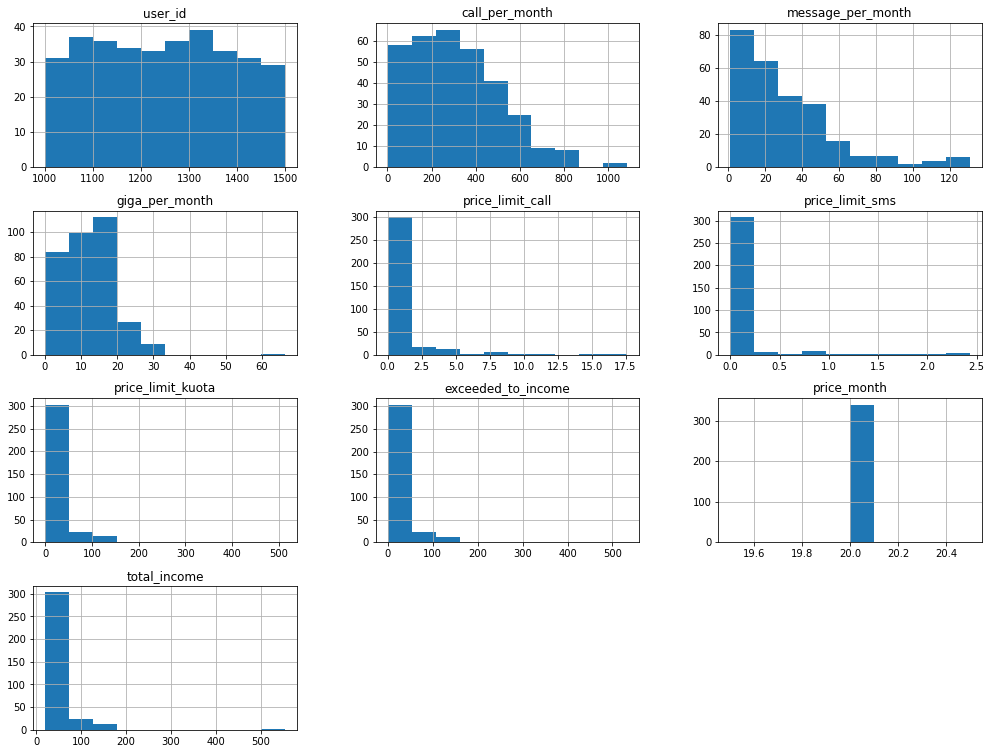

In [109]:
data_surf.hist(figsize= (17,13), bins= 10)
plt.show()

# Menggunakan boxplot untuk melihat dataset data_surf

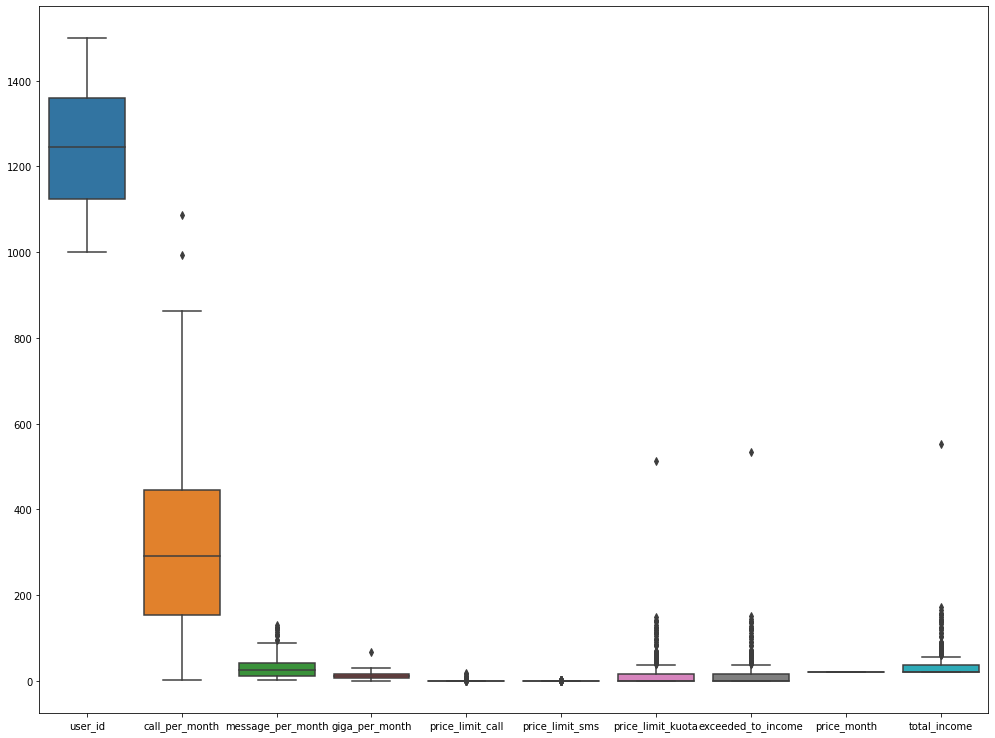

In [110]:
plt.figure(figsize= (17,13))
sns.boxplot(data=data_surf)
plt.show()

# Prilaku user yang menggunakan paket surf, mempunyai kecenderungan untuk kelebihan menggunakan layanan sampai harus membayar kelebihan 36.5 dollar. Dengan pemasukan paling banyak di karenakan menggunakan telepon, di lanjutkan karena penggunaan sms, lalu penggunaan internet jika di lihat dari boxplot. Jika menggunakan metode np.var juga bisa di lihat dari hitungan penggunaan telepon yang melebihi user hampir 1 banding 4, di karenakan memang banyak user yang kelebihan menggunakan kuota telephone sehingga menambah income bagi magline. Sudah jelas memberikan kemiringan positif sebagai statistik pemasukan untuk magline.

## Perilaku konsumen pada paket ultimate 

# Membuat variable baru untuk data ultimate  

In [111]:
data_ultimate = data7.query('plan == "ultimate"')

# Melihat dataset pada table ultimate 

In [112]:
data_ultimate.head()


,user_id,plan,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota,exceeded_to_income,city,price_month,total_income
0,1000,ultimate,116.830000,11.0,1.856904,0.0,0.0,0.000000,0.000000,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0,70.000000
1,1006,ultimate,64.110000,154.0,33.385928,0.0,0.0,23.701494,23.701494,"San Francisco-Oakland-Berkeley, CA MSA",70.0,93.701494
2,1008,ultimate,294.662000,17.0,10.834578,0.0,0.0,0.000000,0.000000,"Orlando-Kissimmee-Sanford, FL MSA",70.0,70.000000
3,1011,ultimate,228.739167,31.0,10.724170,0.0,0.0,0.000000,0.000000,"Cleveland-Elyria, OH MSA",70.0,70.000000
4,1013,ultimate,203.370000,16.0,19.642500,0.0,0.0,0.000000,0.000000,"Knoxville, TN MSA",70.0,70.000000


In [113]:
data_ultimate.describe()

,user_id,call_per_month,message_per_month,giga_per_month,price_limit_call,price_limit_sms,price_limit_kuota,exceeded_to_income,price_month,total_income
count,161.000000,155.000000,132.000000,157.000000,161.0,161.0,161.000000,161.000000,161.0,161.000000
mean,1256.608696,290.453482,33.704545,11.729137,0.0,0.0,0.348855,0.348855,70.0,70.348855
std,150.855899,206.108112,29.079449,6.929926,0.0,0.0,3.158405,3.158405,0.0,3.158405
min,1000.000000,8.730000,1.000000,0.227705,0.0,0.0,0.000000,0.000000,70.0,70.000000
25%,1126.000000,125.786717,11.000000,6.758984,0.0,0.0,0.000000,0.000000,70.0,70.000000
50%,1253.000000,230.782857,25.500000,11.316045,0.0,0.0,0.000000,0.000000,70.0,70.000000
75%,1395.000000,428.705571,50.000000,15.837995,0.0,0.0,0.000000,0.000000,70.0,70.000000
max,1497.000000,994.431429,154.000000,34.637726,0.0,0.0,32.464085,32.464085,70.0,102.464085


# Menggunakan metode varian untuk dataset data ultimate 

In [114]:
np.var(data_ultimate)

user_id               22616.151229
call_per_month        42206.485726
message_per_month       839.208161
giga_per_month           47.717992
price_limit_call          0.000000
price_limit_sms           0.000000
price_limit_kuota         9.913565
exceeded_to_income        9.913565
price_month               0.000000
total_income              9.913565
dtype: float64

# Membuat histogram untuk dataset data_ultimate

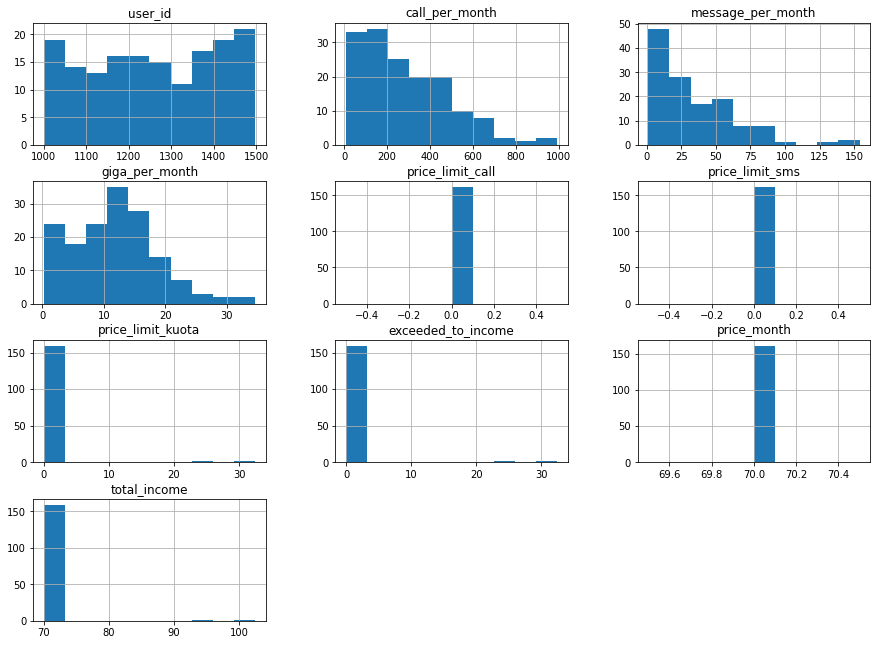

In [115]:
data_ultimate.hist(figsize= (15,11), bins= 10)
plt.show()

# Melihat data_ultimate menggunakan boxplot

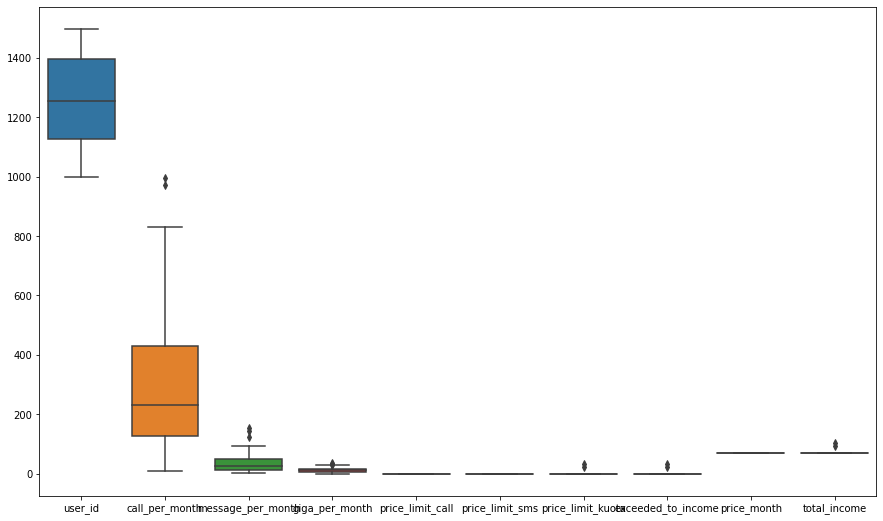

In [116]:
plt.figure(figsize= (15,9))
sns.boxplot(data=data_ultimate)
plt.show()

# Terlihat pada boxplot user dengan paket kuota ultimate memiliki tetap memiliki kemiringan positif, dan bisa di lihat penggunaan telepon tetap menjadi sumber pemasukan paling banyak yang memiliki kecenderungan pemakaian diluar paket kuota yang masih sama. Dengan rata rata pemasukan 70 dollar per user menunjukan kalau pemakaian yang melebihi kuota tidak terlalu banyak. Dari proses eksplorasi sudah terlihat hanya 2 user yang melakukan kelebihan pemakaian kuota data ultimate. 

## Menguji hipotesis

# Menguji hipotesis 

# H0 = Rata - rata pendapatan dari pengguna kuota ultimate dan surf tidak berbeda 

# H1 = Rata - rata pendapatan dari pengguna kuota ultimate dan surf berbeda  

# Dalam pengujian hipotesis untuk mengetahui pendapatan dari kedua jenis paket kuota, penentuan aspek untuk mengetahui perbedaan jumlah rata - rata dari pendapatan dari setiap jenis paket, dimana data yang di gunakan adalah data yang di filter berdasarkan jenis kuota yang di pilih oleh user, dan selanjutnya perhitungan jumlah rata ratanya di olah dengan signifikansi statistiknya sebesar 5%

In [117]:
alpha = 0.05
results = st.ttest_ind(data_ultimate['total_income'],data_surf['total_income'], equal_var=False)
results.pvalue

2.4555437119108964e-39

# Melakukan pengolahan bagaimana hasil dari hipotesis yang sudah di jalankan

In [118]:
if (results.pvalue < alpha):
    print('Bisa menolak hipotesis nol')
else : 
    print('Kita tidak bisa dapat menolah hipotesis nol')


Bisa menolak hipotesis nol


# Memperlihatkan rata - rata biaya pendapatan yang di keluarkan user dari setiap paket kuota 

In [119]:
data_surf['total_income'].mean()




36.55567900667049

In [120]:
data_ultimate['total_income'].mean()

70.34885452692687

# hasil dari hipotesis menolak hipotesis nol dan jelas memang terdapat perbedaan dari kedua paket tersebut, dimana terhitung dari perbedan 50 dollar antara paket surf dan ultimate. Akan tetapi  tercatat pendapatan lebih banyak di dapat dari pemakaian di luar kuota rata rata sebanyak 36 dollar dari setiap user bisa di dapatkan dari paket surf

## Menguji Hipotesis kedua

# H0 : Rata-rata pendapatan dari user di wilayah NY-NJ Tidak berbeda dengan pendapatan user dari wilayah lain.

# H1 : Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan user dari wilayah lain.



# Hipotesis kedua merupakan langkah untuk mengetahui pendapatan dari wilayah yang berbeda. NY dan NJ dijadikan sebagai dasar untuk di bandingkan dengan wilayah lain, denan menggunakan aspek total pendapatan yang di peroleh dari masing masing user dan perbedaan jumlah rata-rata dan wilayah lain. Oleh karena data akan di filter berdasarkan wilayahnya. lalu dihitung jumlah rata rata pendapatannya dengan signifikansi statistik 5%.

# Melakukan pengecekan user yang berada di wilayah NY dan NJ

In [121]:
dff.loc[dff['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA','city'].count()

80

# Membuat variable untuk database berdasarkan wilayah 

In [122]:
data_NY_NJ = data7.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'")
data_without_NY_NJ = data7.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA'")                        

# Melakukan pengujian hipotesis dengan signifikansi statistik 0.05% 

In [123]:
alpha = 0.05
results_city = st.ttest_ind(data_without_NY_NJ['total_income'],data_NY_NJ['total_income'], equal_var=False)
results_city.pvalue

0.7775847644004543

# Menggunakan fungsi if else untuk menentukan hasis statistik

In [124]:
if (results_city.pvalue < alpha):
    print('Bisa menolak hipotesis nol')
else:
    print('Kita tidak bisa dapat menolah hipotesis nol')

Kita tidak bisa dapat menolah hipotesis nol


# Melakukan perhitungan untuk mengetahui rata - rata pendapatan di wilayah NY dan NJ

In [125]:
data_NY_NJ['total_income'].mean()

46.476795558008234

# Rata - rata pendapatan selain NY dan NJ 

In [126]:
data_without_NY_NJ['total_income'].mean()

47.61999313679968

# Dengan hasil tidak bisa menolak hipotesis nol, dilihat rata rata nya tidak jauh berbeda di wilayang NY dan NJ. ataupun di luar wilayah tersebut. rata ratanya bisa dilihat hanya berselisih 1.1 dollar. Jelas tidak jauh berbeda.

## Keimpulan Hipotesis

# Setelah melakukan analysis terdahulu mengenai data yang di sediakan, terdapat perbedaan signifikan dari kedua paket kuota, dimana paket surf 20 dollar dan ultimate 70 dollar. Perbedaan yang mencapai 50 dollar terlihat dari paket kuota yang di sediakan oleh magline memiliki keuntungan sendiri dari setiap paket. Akan tetapi lebih banyak pemasukan yang di dapat dari paket kuota surf, hal ini karena user memiliki kecenderungan untuk menggunakan kuota melibihi dari paket kuota yang di sediakan oleh magline.

# Paket kuota surf yang jauh lebih murah dari paket kuota ultimate menjadi pilihan terbaik bagi user, di lihat dari data yang di sediakan dan setelah melihat rata rata pendapatan dari setiap paket kuota yang tersedia. Kenaikan pendapatan yang di peroleh paket kuota surf sebesar 36 dollar. jika di jumlahkan dari rata rata 20 + 36 dollar = 56 dollar. Dimana angka tersebut masih 14 dollar di bawah harga paket kuota ultimate. Pemilihan user magline tetap memilih paket kuota yang tepat dan team marketing bisa memberikan paket kuota terbaru untuk mendapatkan keuntungan lebih. Sebagai contoh menambahkan pekt kuota baru yang memberikan kuota menelpon lebih banyak. di karenakan paket kuota surf mendapatkan banyak keuntukngan dari penggunaan tlp

#  Jika di lihat berdasarkan wilayah, menggunakan hipotesis yang sudah di lakukan, bisa di simpulkan bahwa tidak jauh berbeda jika di bandingkan dengan pemakaian dari NY dan NJ. Hal ini di karenakan dari data yang di sediakan memang user day NY dan NJ lebih banyak. 

## Saran untuk advertising dan marketing

## 1. Membuat paket baru yang memberikan kuota menelpon lebih banyk
## 2. Promo bisa di lakukan di luar wilayah NY dan Nj. dan paket internet di tambah lagi kuotanya
## 3. Paket ultimate lebih baik di kurangi harganya dan menambah paket baru dengan paket kuota yang di sesuaikan oleh user dengan analysis yang sudah tersedia.
## 